# Our First Model: The Barotropic Gyre (continued)

#### Overview:
In this notebook, we will continue to investigate the results of the Barotropic Gyre experiment - a simple but typical MITgcm experiment.

#### Import modules
Begin by importing modules to conduct calculations and make plots.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

#### Define a path to the model


In [2]:
# enter your path here
model_path = '/Users/johnathonlu/Documents/SJSU/cs185c_spring2025/MITgcm/verification/tutorial_barotropic_gyre'

#### Read in the grid

In [3]:
# fill in the grid information here
n_rows = 62
n_cols = 62

# read in the X and the Y grids
X_file = os.path.join(model_path,'run','XC.data') 
Y_file = os.path.join(model_path,'run','YC.data')
X = np.fromfile(X_file, '>f4').reshape((n_rows, n_cols))
Y = np.fromfile(Y_file, '>f4').reshape((n_rows, n_cols))

## Re-Assessing Model Output
In the previous notebook, we looked at snapshots of our model field at two different times - the start and end. However, it's helpful to watch how your model evolves through time to understand the dynamics at play.

### The Evolution of a Western Boundary Current
In this section, we will make a plot of the evolution of the western boundary current.

In [4]:
# define the iteration numbers
output_iter_step = 3240 - 1080
iter_numbers = np.arange(1080, 12*output_iter_step, output_iter_step)
print(iter_numbers)

[ 1080  3240  5400  7560  9720 11880 14040 16200 18360 20520 22680 24840]


Make a plot of each iteration in a 4x3 grid

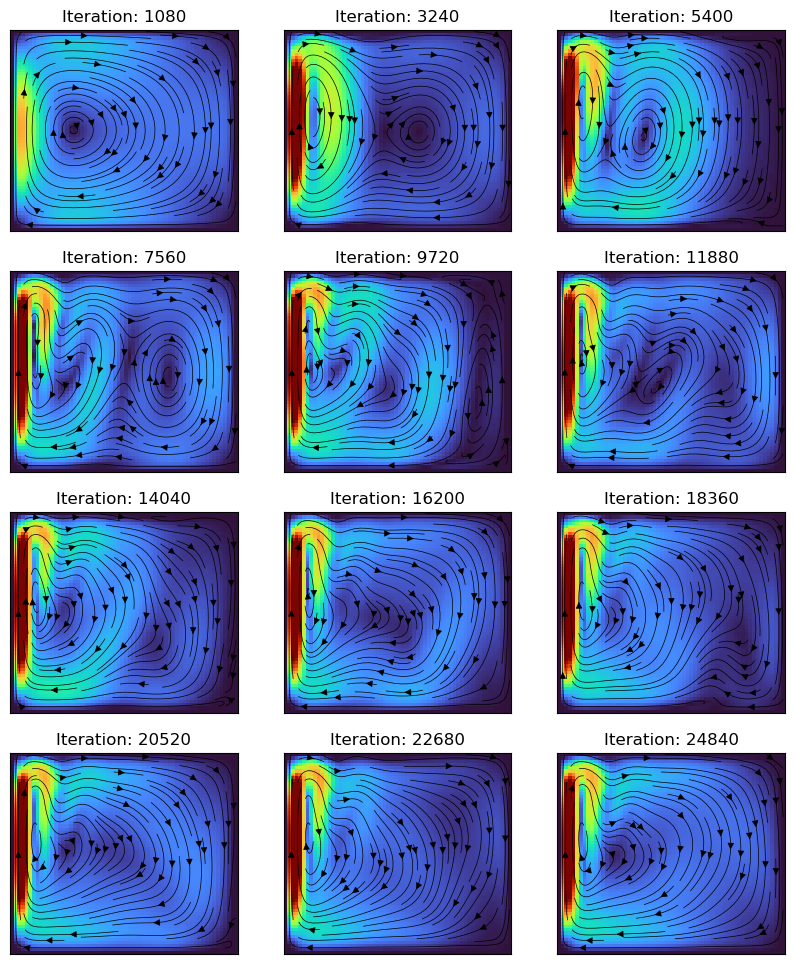

In [5]:
fig = plt.figure(figsize=(10,12))

for i in range(len(iter_numbers)):

    # make a subplot for this figure
    plt.subplot(4,3,i+1)

    # define the zonal velocity file after one year
    u_file = os.path.join(model_path,'run','diags','UVEL','UVEL.'+'{:010d}'.format(iter_numbers[i])+'.data')
    
    # define the meridional velocity file after one year
    v_file = os.path.join(model_path,'run','diags','VVEL','VVEL.'+'{:010d}'.format(iter_numbers[i])+'.data')
    
    # read in the zonal and meridional current velocity grids
    u_grid = np.fromfile(u_file, '>f4').reshape(n_rows,n_cols)
    v_grid = np.fromfile(v_file, '>f4').reshape(n_rows,n_cols)
    
    # compute the speed as a grid
    speed_grid = (u_grid**2 + v_grid**2)**0.5
    
    # plot the speed with streamlines
    C = plt.pcolormesh(X, Y, speed_grid, cmap='turbo', vmin=0, vmax=0.05)
    plt.streamplot(X, Y, u_grid, v_grid, linewidth=0.5, color='k')
    plt.title('Iteration: '+str(iter_numbers[i]))
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    
plt.show()

### &#x1F914; Try It Youself: Sea Surface Height
Modify the model to also output the `ETAN` variable from the `diagnostics` package. After running the model for an additional year, plot the sea surface height fields in panels as was done above.

In [ ]:
#enter your code here
# recommended approximate color bounds: vmin=-0.03, vmax=0.05


### &#x1F914; Try It Youself: The Model In Steady State
Modify the model to run for an additional two years. After running, plot either the currents or the sea surface height fields at 1 year and at 3 years to observe the differences.

In [ ]:
# enter your code here to read in the data



In [ ]:
# enter your code here to plot the fields side-by-side
# the left panel should be the 1-year plot
# the right panel should be the 3-year plot

